In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ikmalsaepulr","key":"7f4e4baf19d3b17ad69ae8866b412388"}'}

In [2]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database/

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 11.0MB/s]


In [5]:
!mkdir diabetes
!unzip pima-indians-diabetes-database.zip -d diabetes
!ls diabetes

Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes/diabetes.csv   
diabetes.csv


In [6]:
df =  pd.read_csv('diabetes/diabetes.csv')

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.shape

(768, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


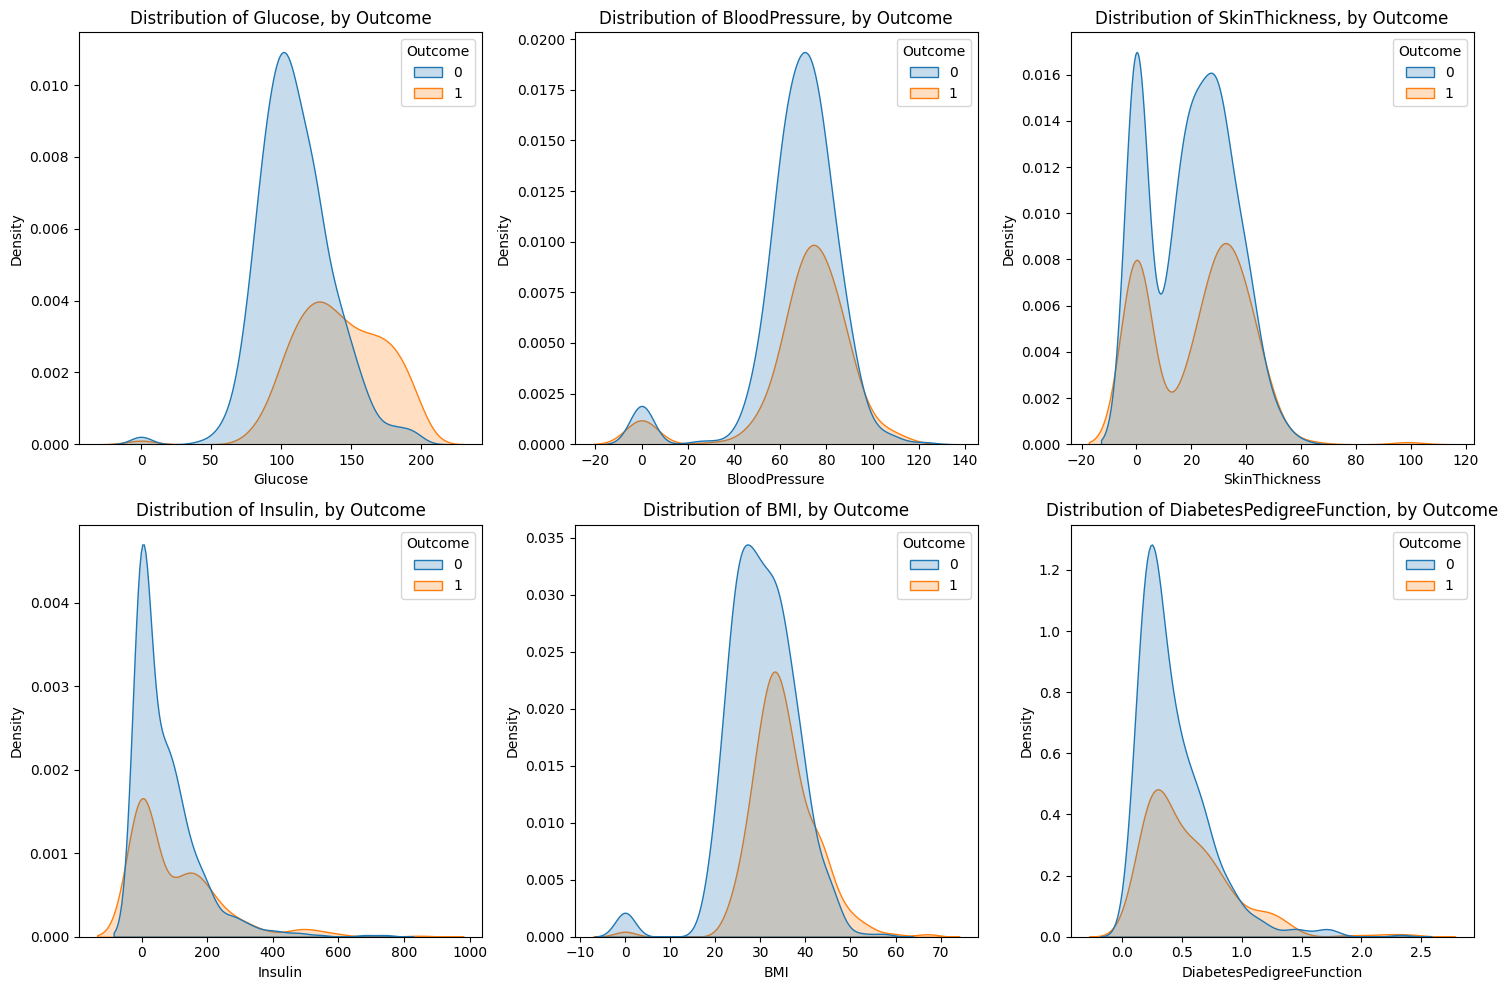

In [10]:
def plot_distributions_by_outcome(data, columns):
    fig, axes = plt.subplots(2, len(columns)//2, figsize=(15, 10))
    for i, column in enumerate(columns):
        row = i // (len(columns)//2)
        col = i % (len(columns)//2)
        sns.kdeplot(data=data, x=column, hue='Outcome', fill=True, ax=axes[row, col])
        axes[row, col].set_title(f"Distribution of {column}, by Outcome")
    plt.tight_layout()
    plt.show()
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
plot_distributions_by_outcome(df, columns)


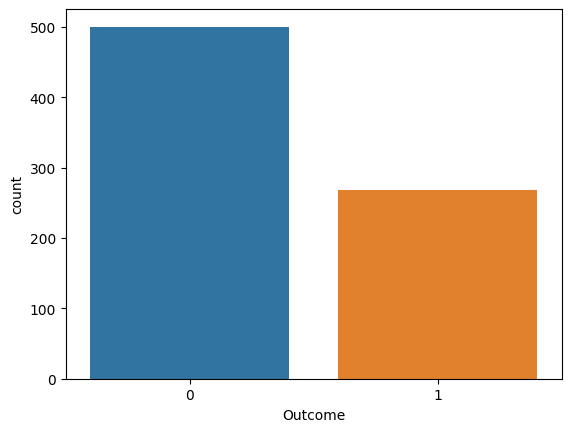

In [11]:
sns.countplot(x=df['Outcome'], data=df)
plt.show()

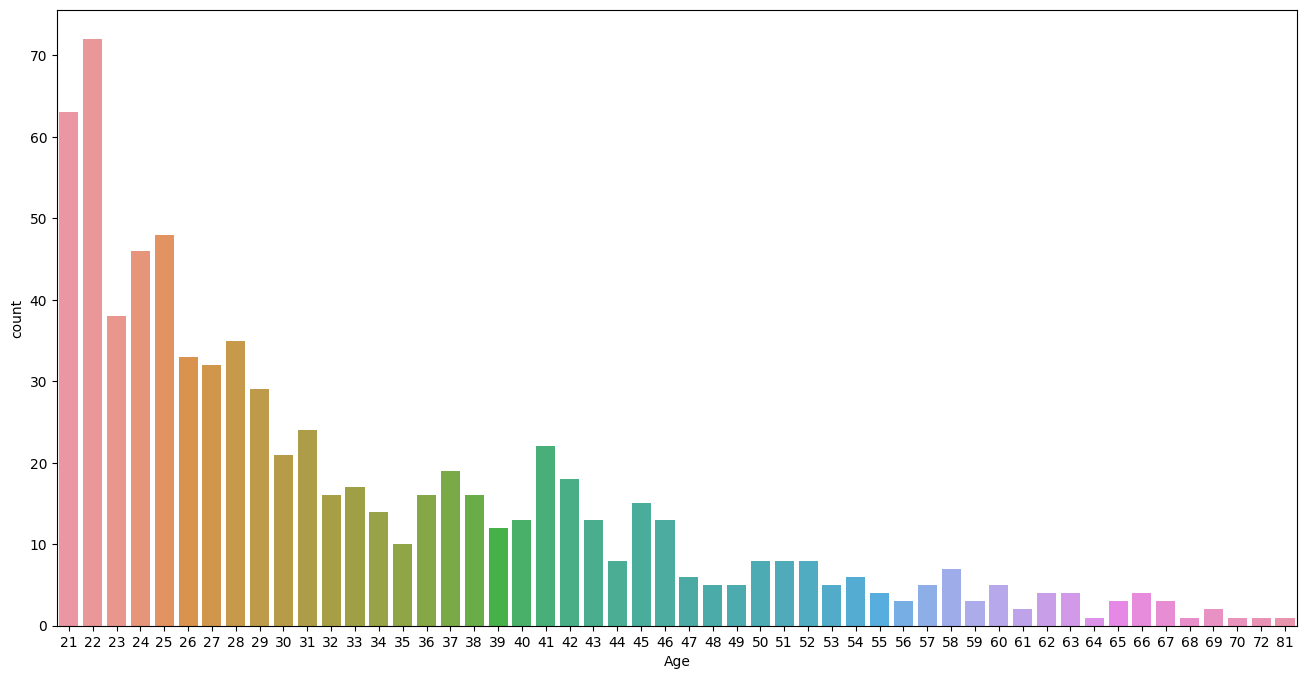

In [12]:
plt.figure(figsize=(16,8))
sns.countplot(x=df['Age'],hue_order=df.Age.value_counts().index[:10])
plt.show()

In [13]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [15]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [16]:
X = df.drop (columns='Outcome', axis=1)
y = df['Outcome']

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(X)

StandardScaler()

In [19]:
standarized_data = scaler.transform(X)

In [20]:
X = standarized_data
y = df['Outcome']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (537, 8) (231, 8)


In [23]:
classifier = svm.SVC(kernel='linear')

In [24]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [25]:
x_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [26]:
print('Tingkat akurasi data training = ', training_data_accuracy)

Tingkat akurasi data training =  0.7821229050279329


In [27]:
x_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [28]:
print('Tingkat akurasi data test = ', test_data_accuracy)

Tingkat akurasi data test =  0.7748917748917749


In [29]:
input_data_test = (6,148,72,35,0,33.6,0.627,50)

array = np.array(input_data_test)

reshape = array.reshape(1,-1)

std_data = scaler.transform(reshape)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('Tidak Beresiko Diabetes')
else :
    print('Beresiko Diabetes')

[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]]
[1]
Beresiko Diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [30]:
import pickle
filename = 'diabetes.sav'
pickle.dump(classifier,open(filename,'wb'))